### Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Performing EDA

In [2]:
df = pd.read_csv('data.csv') #reading data

In [3]:
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


#### Checking for null values

In [4]:
df.isnull()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [5]:
df.isnull().values.any()

False

#### Finding the unique values in our dependent variable

In [6]:
df.y.unique()

array([4, 1, 5, 2, 3], dtype=int64)

- All subjects falling in classes 2, 3, 4, and 5 are subjects who did not have epileptic seizure. Only subjects in class 1 have epileptic seizure

- So our aim here will to keep the output value of y=1 as it is and convert all remaining values i.e 2,3,4,5 to 0 

In [7]:
df["OUTPUT_LABEL"] = df.y == 1
df["OUTPUT_LABEL"] = df["OUTPUT_LABEL"].astype(int)
df.pop('y')
df.drop(df.columns[0], axis=1, inplace=True)

In [8]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,OUTPUT_LABEL
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,0
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,0


#### Plotting the count of dependent variable

<AxesSubplot:xlabel='OUTPUT_LABEL', ylabel='count'>

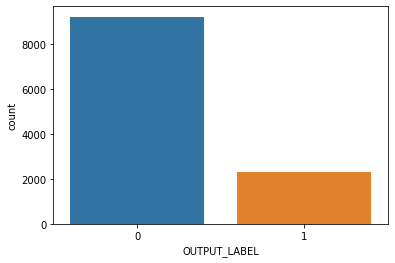

In [9]:
sns.countplot(x='OUTPUT_LABEL',data=df)

- From the above plot we can say that around 20% people are having a seizure present and rest are seizure free

#### Finding the Correaltion

In [10]:
df.corr()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,OUTPUT_LABEL
X1,1.000000,0.947729,0.808192,0.608109,0.393674,0.218226,0.103693,0.044483,0.027923,0.032221,...,0.027263,0.045401,0.051630,0.049604,0.042967,0.036144,0.030581,0.024562,0.020022,-0.031262
X2,0.947729,1.000000,0.944623,0.790403,0.576579,0.369803,0.211793,0.109478,0.060218,0.043565,...,0.012602,0.025937,0.031606,0.030452,0.025975,0.024290,0.023906,0.021962,0.018059,-0.024503
X3,0.808192,0.944623,1.000000,0.939522,0.778648,0.573874,0.382493,0.231084,0.133249,0.080003,...,0.004575,0.011752,0.016424,0.017070,0.014837,0.015536,0.016982,0.017070,0.012419,-0.015615
X4,0.608109,0.790403,0.939522,1.000000,0.938636,0.784954,0.590497,0.399855,0.250052,0.150284,...,-0.001028,0.000632,0.006617,0.011882,0.014496,0.016992,0.016911,0.014671,0.006226,-0.002149
X5,0.393674,0.576579,0.778648,0.938636,1.000000,0.941267,0.792304,0.596424,0.410651,0.265112,...,0.004861,0.000918,0.006488,0.013946,0.019146,0.021924,0.018869,0.013607,0.001298,0.013362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X175,0.036144,0.024290,0.015536,0.016992,0.021924,0.022444,0.014869,-0.000510,-0.018552,-0.036517,...,0.195640,0.366428,0.573335,0.782018,0.936986,1.000000,0.933893,0.759069,0.533265,-0.038926
X176,0.030581,0.023906,0.016982,0.016911,0.018869,0.020977,0.017016,0.005851,-0.009052,-0.025522,...,0.084966,0.195891,0.359400,0.563321,0.767300,0.933893,1.000000,0.931826,0.759381,-0.037875
X177,0.024562,0.021962,0.017070,0.014671,0.013607,0.017383,0.018572,0.012590,0.001943,-0.011809,...,0.022042,0.071946,0.175322,0.337020,0.537493,0.759069,0.931826,1.000000,0.934330,-0.037212
X178,0.020022,0.018059,0.012419,0.006226,0.001298,0.004240,0.008325,0.008032,0.004823,-0.001332,...,-0.004094,0.001945,0.049854,0.155044,0.315385,0.533265,0.759381,0.934330,1.000000,-0.035855


['X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16']


<AxesSubplot:>

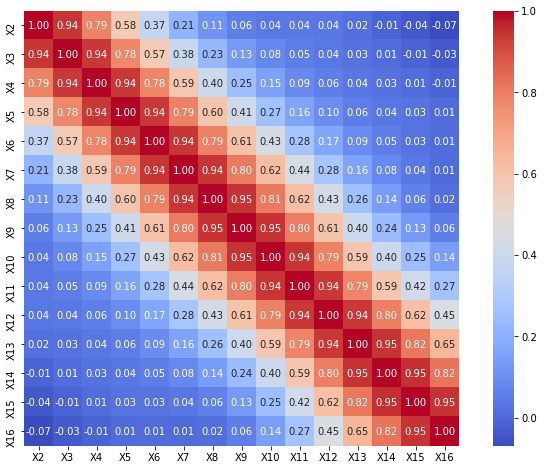

In [11]:
# Considering the first 15 feature cloumn
sel_features= list(df.columns[1:16])
print(sel_features)
corr = df[sel_features].corr() 
plt.figure(figsize=(12,8))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',
           xticklabels= sel_features, yticklabels= sel_features,
           cmap= 'coolwarm')

#### Standardizing the Variables

- k-nearest neighbors is a distance based classifier that classifies new observations based on similarity measures (e.g., distance metrics) with labeled observations of the training set. Standardization makes all variables to contribute equally to the similarity measures .

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()

In [14]:
scaler.fit(df.drop('OUTPUT_LABEL',axis=1))

StandardScaler()

In [15]:
scaled_features = scaler.transform(df.drop('OUTPUT_LABEL',axis=1))

In [16]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1]) #independent features
df_feat.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
0,0.885051,1.209929,1.462764,1.439539,1.242366,0.818262,0.380910,-0.014267,-0.163196,-0.198415,...,0.105907,-0.041630,-0.020282,-0.107131,-0.375743,-0.535944,-0.693858,-0.634144,-0.433290,-0.235399
1,2.400577,2.366190,2.239441,2.109257,2.037441,1.996033,1.941660,1.719102,1.546403,1.484569,...,1.074264,1.057700,0.972841,0.943023,0.982911,1.018615,1.029295,1.023429,0.954241,0.856537
2,-0.123287,-0.169154,-0.225131,-0.172743,-0.149016,-0.179743,-0.312756,-0.409056,-0.484131,-0.547478,...,0.233004,0.407820,0.455214,0.361582,0.193824,0.008151,-0.103237,-0.136872,-0.138593,-0.144405
3,-0.564057,-0.542530,-0.524794,-0.513803,-0.503073,-0.545472,-0.591462,-0.575607,-0.496475,-0.453979,...,-0.426689,-0.436417,-0.417531,-0.397851,-0.375743,-0.428321,-0.389414,-0.364021,-0.347337,-0.320328
4,0.015586,-0.325731,-0.537025,-0.575814,-0.434746,-0.254129,-0.058825,0.041250,-0.089134,-0.329314,...,0.118012,0.085916,0.082040,0.005598,-0.108758,-0.165242,-0.316347,-0.431551,-0.470127,-0.368858


#### Performing the train test split

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['OUTPUT_LABEL'],test_size=0.30)

In [19]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8050, 178)
(3450, 178)
(8050,)
(3450,)


#### Choosing the k value for Knn

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
# Checking the error rate
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error rate')

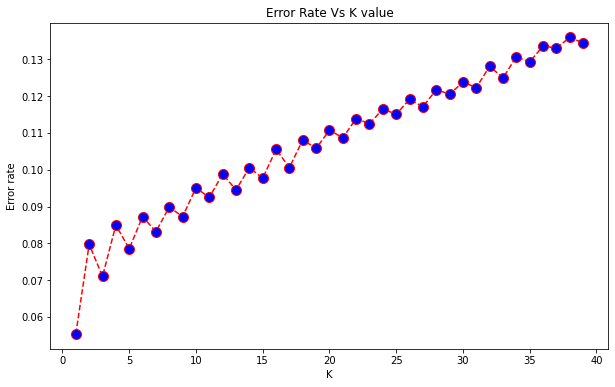

In [22]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='red',linestyle='dashed', marker='o',markerfacecolor='blue',markersize=10)
plt.title('Error Rate Vs K value')
plt.xlabel('K')
plt.ylabel('Error rate')

In [23]:
from sklearn.metrics import confusion_matrix,classification_report
# Now with k=3
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('With k=3')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

With k=3


[[2762    2]
 [ 231  455]]


              precision    recall  f1-score   support

           0       0.92      1.00      0.96      2764
           1       1.00      0.66      0.80       686

    accuracy                           0.93      3450
   macro avg       0.96      0.83      0.88      3450
weighted avg       0.94      0.93      0.93      3450



In [24]:
from sklearn import metrics

In [25]:
knn = KNeighborsClassifier(n_neighbors=3)

In [26]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [27]:
pred = knn.predict(X_test)

In [28]:
print("The accuracy we get after using knn is :",metrics.accuracy_score(y_test, pred))

The accuracy we get after using knn is : 0.932463768115942
